In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%precision

'%r'

In [99]:
df = pd.read_csv("test.csv")
df

,Math,English,Japanese,History,Physics
0,59,41,55,48,71
1,68,42,60,51,61
2,50,64,43,46,85
3,67,56,68,50,81
4,62,69,41,52,82
5,54,53,66,80,32
6,41,67,51,80,60
7,52,68,67,52,34
8,59,54,57,64,31
9,40,63,78,73,52


In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df = pd.DataFrame(df_sc, columns=df.columns)
df.round(2)

,Math,English,Japanese,History,Physics
0,0.41,-1.71,-0.33,-0.91,0.60
1,1.39,-1.61,0.13,-0.67,0.10
2,-0.56,0.65,-1.41,-1.06,1.30
3,1.28,-0.17,0.85,-0.75,1.10
4,0.74,1.16,-1.59,-0.59,1.15
5,-0.13,-0.48,0.67,1.60,-1.34
6,-1.54,0.95,-0.69,1.60,0.05
7,-0.35,1.06,0.76,-0.59,-1.24
8,0.41,-0.38,-0.14,0.34,-1.39
9,-1.65,0.54,1.76,1.05,-0.34


In [101]:
df_corr = df.corr()

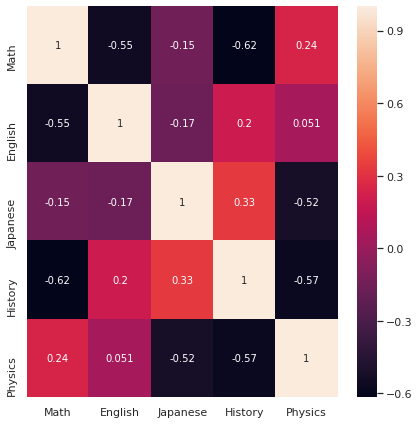

In [102]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df_corr, annot=True)
ax.set_ylim(len(df_corr), 0)
plt.tight_layout()

In [103]:
df_corr.round(2)

,Math,English,Japanese,History,Physics
Math,1.00,-0.55,-0.15,-0.62,0.24
English,-0.55,1.00,-0.17,0.20,0.05
Japanese,-0.15,-0.17,1.00,0.33,-0.52
History,-0.62,0.20,0.33,1.00,-0.57
Physics,0.24,0.05,-0.52,-0.57,1.00


In [104]:
df_cov = pd.DataFrame(np.cov(df, rowvar=False), columns=df_corr.columns, index=df_corr.columns)

In [105]:
df_cov.round(2)

,Math,English,Japanese,History,Physics
Math,1.11,-0.61,-0.17,-0.68,0.27
English,-0.61,1.11,-0.19,0.22,0.06
Japanese,-0.17,-0.19,1.11,0.37,-0.58
History,-0.68,0.22,0.37,1.11,-0.63
Physics,0.27,0.06,-0.58,-0.63,1.11


In [119]:
np.cov(df, rowvar=False)

array([[ 1.11111111, -0.61078367, -0.1662149 , -0.68421839,  0.2705068 ],
       [-0.61078367,  1.11111111, -0.19105669,  0.21728844,  0.05658923],
       [-0.1662149 , -0.19105669,  1.11111111,  0.37060952, -0.57821353],
       [-0.68421839,  0.21728844,  0.37060952,  1.11111111, -0.63001633],
       [ 0.2705068 ,  0.05658923, -0.57821353, -0.63001633,  1.11111111]])

In [107]:
eig_val, eig_vec = np.linalg.eig(df_corr)

In [108]:
print("eigen_values:\n{}".format(eig_val))
print("eigen_vectors:\n{}".format(eig_vec))

eigen_values:
[2.30264676 1.49802163 0.23184701 0.42901818 0.53846642]
eigen_vectors:
[[-0.50090465  0.41047621  0.63500116  0.41827063 -0.04926476]
 [ 0.23046339 -0.66574033  0.31279565  0.5008269   0.39371023]
 [ 0.36644607  0.49589252  0.15372809 -0.19314255  0.7475771 ]
 [ 0.57464395 -0.00730303  0.60571316 -0.28002816 -0.47373705]
 [-0.48112656 -0.37727493  0.32925923 -0.67712797  0.24344799]]


In [109]:
eig_vec_pc1 = eig_vec[:, 0]
eig_vec_pc1.round(2)#第一主成分の固有ベクトル

array([-0.5 ,  0.23,  0.37,  0.57, -0.48])

In [110]:
pc1 = np.dot(df, eig_vec_pc1)
pc1.round(2)#第一主成分の主成分得点

array([-1.53, -1.46, -1.32, -1.33, -1.58,  1.76,  1.63,  0.95,  0.52,
        2.36])

In [111]:
eig_val_pc1 = eig_val[0]
eig_val_pc1.round(2)#第一主成分の固有値

2.3

In [112]:
from sklearn.decomposition import PCA
pca = PCA()
feature = pca.fit_transform(df)

In [113]:
df_1 = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df.columns))])
df_1.round(2)

,PC1,PC2,PC3,PC4,PC5
0,-1.53,-0.93,-0.36,-0.78,-0.68
1,-1.46,-1.67,-0.26,-0.13,0.02
2,-1.32,1.85,0.05,-0.22,-0.59
3,-1.33,-0.65,1.13,-0.25,0.80
4,-1.58,1.69,-0.21,0.58,0.60
5,1.76,-1.09,-0.76,0.04,0.40
6,1.63,1.64,-0.81,-0.52,0.20
7,0.95,-0.00,0.98,1.24,-0.54
8,0.52,-0.87,-0.78,0.86,-0.13
9,2.36,0.04,1.03,-0.82,-0.09


In [114]:
df_2 = pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(df.columns))])
df_2.round(2)

,0
PC1,2.56
PC2,1.66
PC3,0.60
PC4,0.48
PC5,0.26


In [115]:
pca.explained_variance_.round(2)

array([2.56, 1.66, 0.6 , 0.48, 0.26])

In [116]:
pca.get_covariance().round(2)

array([[ 1.11, -0.61, -0.17, -0.68,  0.27],
       [-0.61,  1.11, -0.19,  0.22,  0.06],
       [-0.17, -0.19,  1.11,  0.37, -0.58],
       [-0.68,  0.22,  0.37,  1.11, -0.63],
       [ 0.27,  0.06, -0.58, -0.63,  1.11]])

In [117]:
pca.components_.T

array([[-0.50090465, -0.41047621, -0.04926476,  0.41827063,  0.63500116],
       [ 0.23046339,  0.66574033,  0.39371023,  0.5008269 ,  0.31279565],
       [ 0.36644607, -0.49589252,  0.7475771 , -0.19314255,  0.15372809],
       [ 0.57464395,  0.00730303, -0.47373705, -0.28002816,  0.60571316],
       [-0.48112656,  0.37727493,  0.24344799, -0.67712797,  0.32925923]])

$$標準化された値=\frac{データ-平均(μ)}{標準偏差(σ)}$$

$$分散(σ^2)=\frac{1}{n-1} \sum_{i=1}^n (x_i-\mu)^2$$


$$ \begin{align} V_z & = \frac{1}{N} \sum_{n=1}^N ({\bf u^T} {\bf x}_n)^2 \\ & = {\bf u^T} \left( \frac{1}{N} \sum_{n=1}^N {\bf x}_n {\bf x^T}_n \right) {\bf u} \\ & = {\bf u^T} {\bf V_x} {\bf u} \end{align} $$

$$ L(\lambda, {\bf u}) = {\bf u^T} {\bf V_x} {\bf u} + \lambda (1 - \bf u^T u) $$



$$寄与率=\frac{n個目の固有ベクトル}{総分散}$$

$$累積寄与率=\frac{全ての固有ベクトルの和}{総分散}$$

$$変数一つ目(x_1)の第一因子負荷量=a_{11}=\sqrt{\lambda_1}e_{11}$$
$$変数一つ目(x_1)の第二因子負荷量=a_{12}=\sqrt{\lambda_2}e_{12}$$
$$変数二つ目(x_2)の第一因子負荷量=a_{21}=\sqrt{\lambda_1}e_{21}$$
$$変数二つ目(x_2)の第二因子負荷量=a_{22}=\sqrt{\lambda_2}e_{22}$$

In [37]:
a = np.array([1, 2, 3])
print(np.var(a))
print(np.var(a, ddof=1))

0.6666666666666666
1.0


In [40]:
b = (a - np.mean(a)) / np.std(a)
print(np.var(b))
print(np.var(b, ddof=1))

0.9999999999999999
1.4999999999999998


In [215]:
df_mini = pd.read_csv("tes2.csv")
df_mini

,English,Math
0,4,7
1,2,10
2,6,4
3,3,5
4,5,8
5,8,2
6,4,10
7,5,4
8,8,5
9,7,5


In [216]:
def standardization(data):
    mean = np.mean(data)
    std = np.std(data)
    SD = (data - mean) / std
    return SD

In [231]:
print(np.var(df_mini["English"], ddof=1))
print(np.var(df_mini["Math"], ddof=1))

4.177777777777778
7.111111111111111


In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sd = scaler.fit_transform(df_mini)
df_sd = pd.DataFrame(df_sd, columns=df_mini.columns)
df_sd

,English,Math
0,-0.618853,0.395285
1,-1.650274,1.581139
2,0.412568,-0.790569
3,-1.134563,-0.395285
4,-0.103142,0.790569
5,1.443990,-1.581139
6,-0.618853,1.581139
7,-0.103142,-0.790569
8,1.443990,-0.395285
9,0.928279,-0.395285


In [218]:
df_cov = pd.DataFrame(np.cov(df_sd["English"] , y = df_sd["Math"], rowvar=False), 
                      columns=df_mini.columns)
df_cov

,English,Math
0,1.111111,-0.770110
1,-0.770110,1.111111


In [229]:
print("variance:\n{}".format(np.var(df_sd, ddof=0)))

variance:
English    1.0
Math       1.0
dtype: float64


In [220]:
eig_val, eig_vec = np.linalg.eig(df_cov)
print("eigen_values{}".format(eig_val))
print("eigen_vector{}".format(eig_vec))

eigen_values[1.88122064 0.34100158]
eigen_vector[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [221]:
df_corr = df_mini.corr()
df_corr

,English,Math
English,1.000000,-0.693099
Math,-0.693099,1.000000


In [222]:
df_corr1 = df_sd.corr()
df_corr1

,English,Math
English,1.000000,-0.693099
Math,-0.693099,1.000000


In [541]:
eig_val, eig_vec = np.linalg.eig(df_corr)
print("eigen_values{}".format(eig_val))
print("eigen_vector{}".format(eig_vec))

eigen_values[1.69309858 0.30690142]
eigen_vector[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [545]:
type(eig_val)
eig_val[1]
eig_vec[1, 0]

-0.7071067811865476

In [516]:
# eig_val, eig_vec = np.linalg.eig(df_cov)
# print("eigen_values{}".format(eig_val))
# print("eigen_vector{}".format(eig_vec))

In [547]:
fc = []
for i in range(0, 2):
    for v in range(0,2):
        factors = np.sqrt(eig_val[int(i)]) * eig_vec[int(i), int(v)]
        fc.append(factors)
        v += 1
    i += 1
        

In [548]:
fc

[0.9200811316452702,
 0.9200811316452703,
 -0.39172785347784356,
 0.3917278534778435]

In [550]:
(1.69309858 + 0.30690142) / 2

1.0

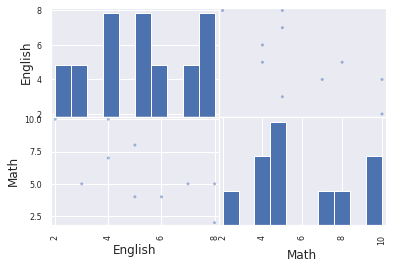

In [553]:
pd.plotting.scatter_matrix(df_mini)
plt.show()

In [554]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_mini)
df_scaler = scaler.transform(df_mini)

In [557]:
df_scaler#標準化されたミニデータ

array([[-0.61885275,  0.39528471],
       [-1.65027399,  1.58113883],
       [ 0.4125685 , -0.79056942],
       [-1.13456337, -0.39528471],
       [-0.10314212,  0.79056942],
       [ 1.44398974, -1.58113883],
       [-0.61885275,  1.58113883],
       [-0.10314212, -0.79056942],
       [ 1.44398974, -0.39528471],
       [ 0.92827912, -0.39528471]])

In [568]:
from sklearn.decomposition import FactorAnalysis as FA
n_component = 2
fa = FA(n_components=n_component, max_iter=500)
fitted = fa.fit_transform(df_scaler)
fitted

array([[ 0.43185973,  0.        ],
       [ 1.37606305,  0.        ],
       [-0.51234359,  0.        ],
       [ 0.31481402,  0.        ],
       [ 0.38057763,  0.        ],
       [-1.28821908,  0.        ],
       [ 0.9368432 ,  0.        ],
       [-0.29273366,  0.        ],
       [-0.78323562,  0.        ],
       [-0.56362569,  0.        ]])

In [569]:
fa.components_.T

array([[-0.72098816, -0.        ],
       [ 0.72098816, -0.        ]])

In [570]:
df = pd.read_csv("test.csv")
df

,Math,English,Japanese,History,Physics
0,59,41,55,48,71
1,68,42,60,51,61
2,50,64,43,46,85
3,67,56,68,50,81
4,62,69,41,52,82
5,54,53,66,80,32
6,41,67,51,80,60
7,52,68,67,52,34
8,59,54,57,64,31
9,40,63,78,73,52


In [572]:
scaler = StandardScaler()
scaler.fit(df)
df_scaler = scaler.transform(df)
df_scaler

array([[ 0.41226488, -1.71149324, -0.32614262, -0.90791396,  0.60312568],
       [ 1.38868172, -1.60900862,  0.12683324, -0.67310863,  0.10467471],
       [-0.56415195,  0.64565314, -1.41328469, -1.06445086,  1.30095705],
       [ 1.28019096, -0.17422386,  0.85159462, -0.75137707,  1.10157666],
       [ 0.73773716,  1.15807627, -1.59447503, -0.59484018,  1.15142176],
       [-0.13018891, -0.48167774,  0.67040427,  1.59667628, -1.34083313],
       [-1.54056878,  0.95310701, -0.68852331,  1.59667628,  0.05482961],
       [-0.34717043,  1.05559164,  0.76099945, -0.59484018, -1.24114294],
       [ 0.41226488, -0.37919311, -0.14495228,  0.34438116, -1.39067823],
       [-1.64905954,  0.54316851,  1.75754634,  1.04879717, -0.34393117]])

In [573]:
n_component = 3
fa = FA(n_components=n_component, max_iter=500)
fitted = fa.fit_transform(df_scaler)
fitted

array([[-0.87059038, -0.24427944, -0.02423941],
       [-1.04778095, -1.00664072, -0.20095861],
       [-0.52155245,  1.57093643,  0.14101504],
       [-0.99389116, -0.36324041,  0.39196565],
       [-0.79930602,  1.05971582, -0.57341938],
       [ 1.01548249, -1.10472661, -0.60707573],
       [ 1.40697346,  0.885999  , -0.73477395],
       [ 0.2210102 , -0.01998521,  1.12904646],
       [ 0.14871402, -0.80352684, -0.3749071 ],
       [ 1.44094077,  0.02574799,  0.85334705]])

In [574]:
fa.components_.T

array([[-0.80731212, -0.36559904, -0.10326047],
       [ 0.38980982,  0.60167283,  0.11131055],
       [ 0.37074285, -0.54713368,  0.35434888],
       [ 0.8571986 , -0.17173167, -0.19944752],
       [-0.55896064,  0.52742918, -0.04803932]])

In [575]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46052935, 0.76013368, 0.86782696, 0.9536306 , 1.        ])

In [662]:
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()

In [606]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [607]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [663]:
# print(iris.DESCR)

In [664]:
scaler = StandardScaler()
iris_sc = scaler.fit_transform(iris.data)

In [667]:
pca = PCA()
feature = pca.fit_transform(iris_sc)

In [669]:
iris_data = pd.DataFrame(feature,
                    columns=iris.feature_names)

In [672]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(iris_data.columns))]).head()

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


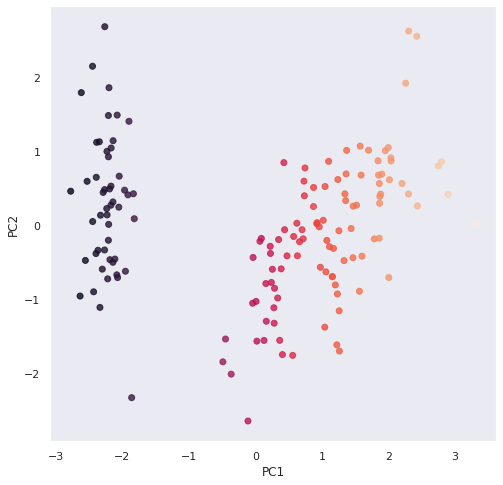

In [674]:
plt.figure(figsize=(8, 8))
plt.scatter(feature[:, 0],  feature[:, 1], alpha=0.8, c=list(iris_data.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [675]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(iris_data.columns))])

,0
PC1,0.729624
PC2,0.228508
PC3,0.036689
PC4,0.005179


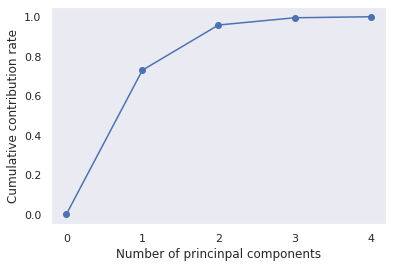

In [677]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), '-o')
plt.xlabel("Number of princinpal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [680]:
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(iris_data.columns))])

,0
PC1,2.938085
PC2,0.920165
PC3,0.147742
PC4,0.020854


In [683]:
pd.DataFrame(pca.components_, columns=iris_data.columns[1:], index=["PC{}".format(x + 1) for x in range(len(iris_data.columns))])

ValueError: Shape of passed values is (4, 4), indices imply (4, 3)

In [656]:
iris_target = pd.DataFrame(iris.target, columns=["Species"])

In [657]:
def flower(num):
    if num ==0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'virginica'
    
iris_target['Species'] = iris_target['Species'].apply(flower)

In [658]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [660]:
# sns.pairplot(iris, hue='Species')

In [687]:
df = pd.read_csv("test.csv")
df

,Math,English,Japanese,History,Physics,Chemistry
0,43,95,88,92,64,63
1,57,60,92,69,51,44
2,56,80,82,66,65,57
3,39,90,100,89,59,32
4,41,74,90,78,48,35
5,59,32,47,47,46,63
6,40,69,43,47,47,55
7,42,61,84,77,63,50
8,53,71,46,61,35,50
9,40,70,65,51,53,51


In [729]:
df.describe()

,Math,English,Japanese,History,Physics,Chemistry
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000
mean,64.500000,63.781250,64.18750,63.937500,68.312500,69.000000
std,20.446626,17.619151,18.88409,16.404047,17.229827,20.631951
min,31.000000,32.000000,33.00000,30.000000,35.000000,31.000000
25%,45.250000,51.250000,47.00000,51.000000,56.750000,54.000000
50%,63.000000,65.000000,61.50000,63.000000,66.000000,66.000000
75%,81.250000,74.250000,82.50000,76.250000,84.000000,87.500000
max,98.000000,96.000000,100.00000,94.000000,94.000000,100.000000


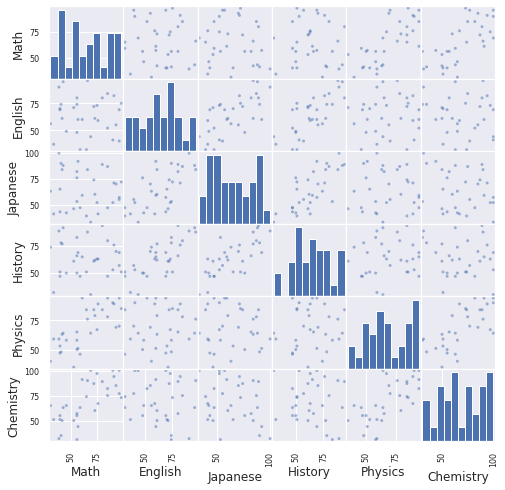

In [688]:
pd.plotting.scatter_matrix(df, alpha=.5, figsize=(8, 8))
plt.show()

(0, 6)

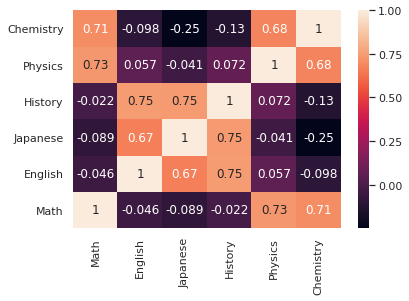

In [703]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.ylim(0,6)

In [704]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
df_pca = pca.transform(df)

In [708]:
df_pca = pd.DataFrame(data = df_pca, columns= ["PC{}".format(num + 1) for num in range(len(df.columns))])
df_pca#主成分得点のデータフレーム

,PC1,PC2,PC3,PC4,PC5,PC6
0,35.404040,-36.200873,-16.100422,0.888888,-4.217646,-2.060478
1,34.439074,-5.402136,20.290548,-12.720360,-0.065672,2.384002
2,21.800718,-14.463342,1.055277,0.898507,-0.295015,11.195625
3,59.944613,-31.451630,6.377606,5.468358,-6.572227,2.779732
4,53.848430,-9.974825,8.938051,-2.960553,-1.167056,0.378671
5,2.126099,43.123443,7.589020,-12.378776,5.292865,-7.310349
6,23.128311,31.585097,-16.075330,8.566977,9.644735,7.491978
7,33.564457,-5.827770,5.890723,-5.205174,-14.959679,-4.499997
8,27.808602,22.338431,-7.981593,5.735596,24.617930,-4.419032
9,29.999860,16.016345,-5.934527,1.952233,0.363293,13.029116


In [710]:
ex_ratio =    pca.explained_variance_ratio_

df_ex_ratio = pd.DataFrame(ex_ratio, columns=["Contribution ratio"], 
                           index=["PC{}".format(num + 1) for num in range(len(df.columns))])
df_ex_ratio

,Contribution ratio
PC1,0.460216
PC2,0.355011
PC3,0.065365
PC4,0.047237
PC5,0.041483
PC6,0.030688


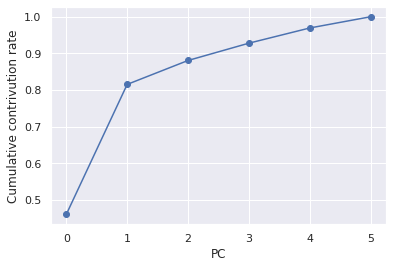

In [715]:
cc_ratio = np.cumsum(ex_ratio)

plt.plot(cc_ratio, marker="o")
plt.xlabel("PC")
plt.ylabel("Cumulative contrivution rate")
plt.show()

In [727]:
eigen_vector = pca.components_.T
pc_loading = pd.DataFrame(eigen_vector, index=[df.columns],
                          columns=["PC{}".format(num + 1) for num in range(len(df.columns))])
pc_loading#因子負荷量

,PC1,PC2,PC3,PC4,PC5,PC6
Math,-0.560478,-0.259596,0.547765,0.045087,0.560792,-0.043670
English,0.194064,-0.530441,-0.451009,0.402600,0.388183,0.405942
Japanese,0.280052,-0.546999,0.357497,-0.559986,-0.250723,0.343676
History,0.186062,-0.508233,-0.067060,0.058517,-0.053490,-0.834444
Physics,-0.431704,-0.264589,0.102704,0.497299,-0.683705,0.135340
Chemistry,-0.590582,-0.154032,-0.594723,-0.521119,-0.040619,-0.024016


In [730]:
df = pd.read_csv("test.csv")

In [737]:
from sklearn.decomposition import FactorAnalysis as FA
n_factors=3
fa = FA(n_factors)
fa.fit(df)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=3,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

In [738]:
df_factor_loading = pd.DataFrame(fa.components_.T, columns=["factor{}".format(num) for num in range(n_factors)],
                                index=df.columns)
df_factor_loading#因子負荷量

,factor0,factor1,factor2
Math,-18.130219,-2.788866,-6.255015
English,2.096878,-13.985639,2.709778
Japanese,4.224246,-14.937797,-0.183004
History,2.067944,-14.348008,1.509604
Physics,-13.146256,-3.182248,-0.461922
Chemistry,-18.343359,0.981871,6.670941


In [736]:
factor_score = fa.transform(df)
factor_scores = pd.DataFrame(factor_score, columns=["factor_{}".format(num) for num in range(n_factors)],
                            index=df.index)
factor_scores

,factor_0,factor_1,factor_2
0,0.803860,-1.458180,1.275276
1,0.918541,-0.454647,-0.975029
2,0.558448,-0.517385,-0.078677
3,1.679138,-1.515657,-0.304324
4,1.564512,-0.773201,-0.433034
5,0.305149,1.343399,-0.374275
6,0.982908,0.988026,0.483590
7,1.082812,-0.463292,0.233858
8,0.874872,0.393676,-0.364264
9,1.091785,0.500956,0.281706


In [741]:
factor_scores.to_csv("factor_scores.csv")